In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly 
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot,iplot
import cufflinks as cf
from sklearn.metrics import accuracy_score
    

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.read_csv(r'D:\Disease Prediction\diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [8]:
df.shape



(768, 9)

In [9]:
df.size

6912

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


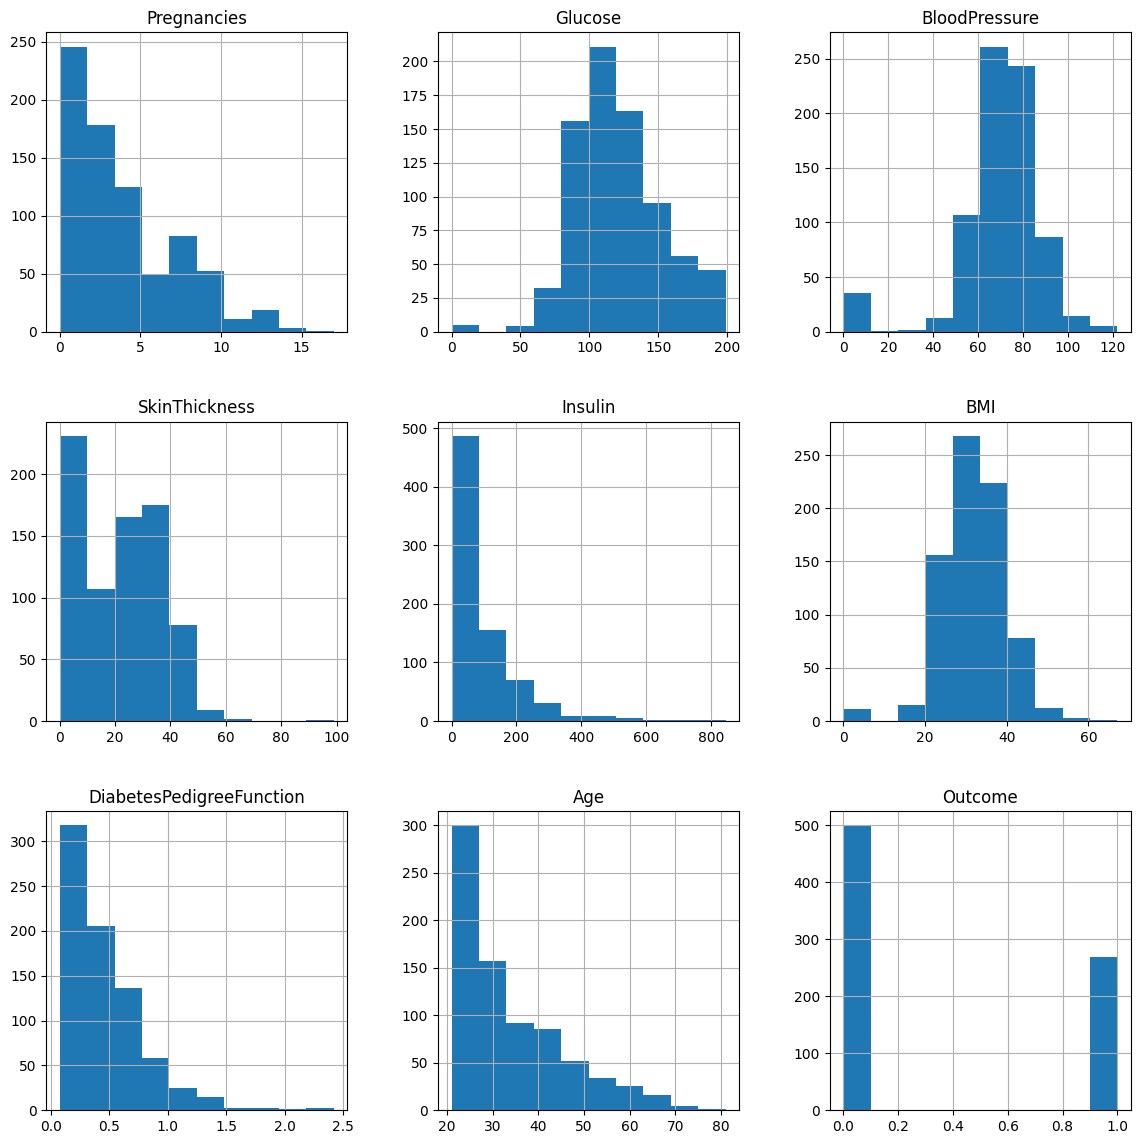

In [12]:
#Visualization 
df.hist(figsize=(14,14))
plt.show()

<AxesSubplot: xlabel='Insulin', ylabel='Outcome'>

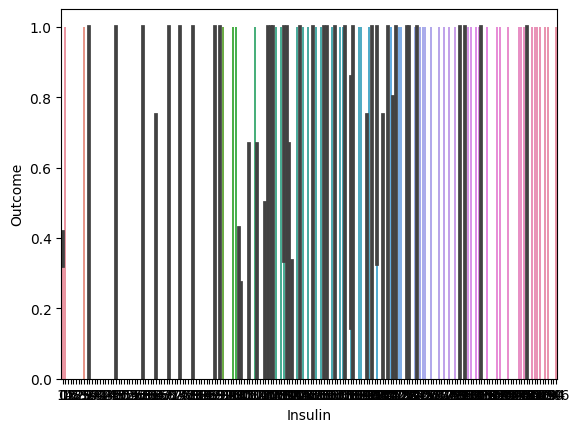

In [13]:
sns.barplot(data=df,x="Insulin", y="Outcome")



<AxesSubplot: xlabel='Insulin', ylabel='Age'>

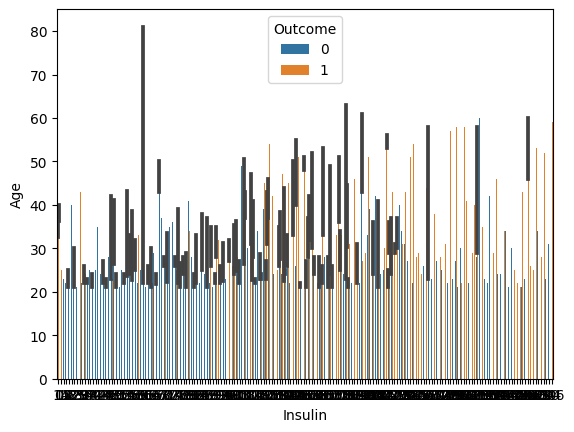

In [14]:
sns.barplot(data=df,x="Insulin", y="Age",hue=df['Outcome'])

In [15]:
px.bar(df,df['Age'],df['Outcome'])

In [16]:
numeric_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin']

<AxesSubplot: >

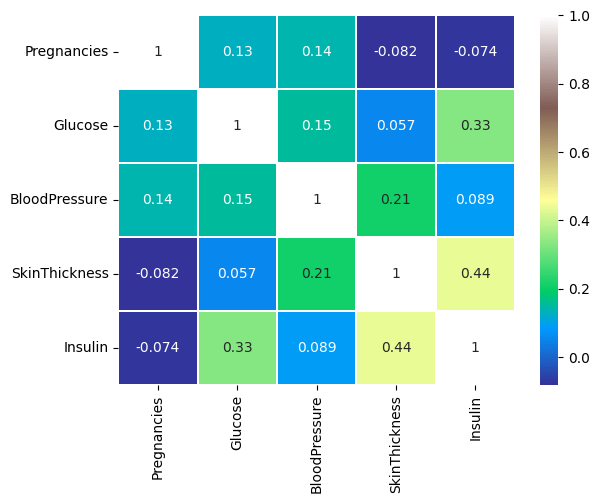

In [17]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)

In [18]:
#Data Preprocessing


In [19]:
X,Y = df.loc[:,:'Age'],df['Outcome']

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
X.shape

(768, 8)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=10,test_size=0.3,shuffle=True)

In [25]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
491,2,89,90,30,0,33.5,0.292,42
69,4,146,85,27,100,28.9,0.189,27
667,10,111,70,27,0,27.5,0.141,40
566,1,99,72,30,18,38.6,0.412,21
97,1,71,48,18,76,20.4,0.323,22
...,...,...,...,...,...,...,...,...
369,1,133,102,28,140,32.8,0.234,45
320,4,129,60,12,231,27.5,0.527,31
527,3,116,74,15,105,26.3,0.107,24
125,1,88,30,42,99,55.0,0.496,26


In [26]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
568,4,154,72,29,126,31.3,0.338,37
620,2,112,86,42,160,38.4,0.246,28
456,1,135,54,0,0,26.7,0.687,62
197,3,107,62,13,48,22.9,0.678,23
714,3,102,74,0,0,29.5,0.121,32
...,...,...,...,...,...,...,...,...
345,8,126,88,36,108,38.5,0.349,49
408,8,197,74,0,0,25.9,1.191,39
304,3,150,76,0,0,21.0,0.207,37
686,3,130,64,0,0,23.1,0.314,22


In [27]:
#decision tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier


In [29]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train.values,Y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
568,4,154,72,29,126,31.3,0.338,37
620,2,112,86,42,160,38.4,0.246,28
456,1,135,54,0,0,26.7,0.687,62
197,3,107,62,13,48,22.9,0.678,23
714,3,102,74,0,0,29.5,0.121,32
...,...,...,...,...,...,...,...,...
345,8,126,88,36,108,38.5,0.349,49
408,8,197,74,0,0,25.9,1.191,39
304,3,150,76,0,0,21.0,0.207,37
686,3,130,64,0,0,23.1,0.314,22


In [31]:
prediction = dt.predict(X_test.values)


In [32]:
Y_test

568    0
620    0
456    0
197    1
714    0
      ..
345    0
408    1
304    0
686    0
202    0
Name: Outcome, Length: 231, dtype: int64

In [33]:
prediction

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [34]:
accuracy_dt = accuracy_score(Y_test,prediction)*100

In [35]:
accuracy_dt

77.05627705627705

In [36]:
dt.feature_importances_

array([0.03596422, 0.58389933, 0.06485652, 0.        , 0.01477204,
       0.10444369, 0.04620753, 0.14985667])

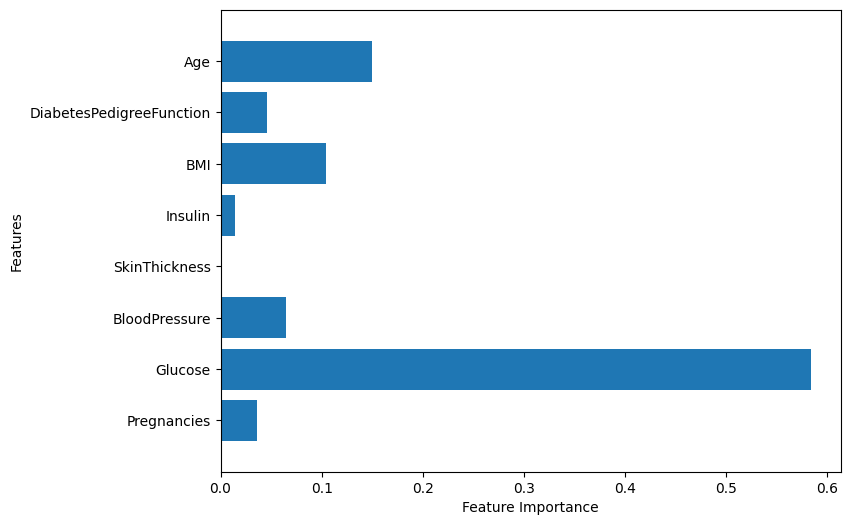

In [37]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.ylim(-1,n_features)
    
plot_feature_importance(dt)
    

In [38]:
X_test


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
568,4,154,72,29,126,31.3,0.338,37
620,2,112,86,42,160,38.4,0.246,28
456,1,135,54,0,0,26.7,0.687,62
197,3,107,62,13,48,22.9,0.678,23
714,3,102,74,0,0,29.5,0.121,32
...,...,...,...,...,...,...,...,...
345,8,126,88,36,108,38.5,0.349,49
408,8,197,74,0,0,25.9,1.191,39
304,3,150,76,0,0,21.0,0.207,37
686,3,130,64,0,0,23.1,0.314,22


In [39]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
custom_data = np.array([[1,85,66,29,0,26.6,0.351,31]])

In [41]:
custom_data_prediciton_dt = dt.predict(custom_data)

In [42]:
custom_data_prediciton_dt

array([0], dtype=int64)

In [43]:
#KNN Model


In [44]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X)
X_std = std.transform(X)

In [45]:
X_train_std,X_test_std,Y_train,Y_test = train_test_split(X_std,Y,random_state=10,test_size=0.3,shuffle=True)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(n_neighbors=17)

In [47]:
prediction_knn = knn.predict(X_test_std)

In [48]:
accuracy_knn = accuracy_score(Y_test,prediction_knn)*100

In [49]:
accuracy_knn

72.72727272727273

In [50]:
custom_data_knn = np.array([[1,85,66,29,0,26.6,0.351,31]])

In [51]:
Custom_data_knn_std = std.transform(custom_data_knn)

C:\Users\Dwij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [52]:
custom_data_prediction_knn = knn.predict(Custom_data_knn_std)


In [53]:
custom_data_prediction_knn

array([0], dtype=int64)

In [54]:
#Finding the best k value for knn

In [55]:
k_range = range(1,26)
scores = {}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,Y_train)
    prediction_knn = knn.predict(X_test_std)
    scores[k] = accuracy_score(Y_test,prediction_knn)

In [56]:
scores

{1: 0.696969696969697,
 2: 0.6796536796536796,
 3: 0.7012987012987013,
 4: 0.6753246753246753,
 5: 0.6666666666666666,
 6: 0.696969696969697,
 7: 0.6883116883116883,
 8: 0.683982683982684,
 9: 0.7012987012987013,
 10: 0.7012987012987013,
 11: 0.7012987012987013,
 12: 0.70995670995671,
 13: 0.7186147186147186,
 14: 0.7186147186147186,
 15: 0.7056277056277056,
 16: 0.7056277056277056,
 17: 0.7272727272727273,
 18: 0.70995670995671,
 19: 0.7142857142857143,
 20: 0.7056277056277056,
 21: 0.70995670995671,
 22: 0.70995670995671,
 23: 0.7056277056277056,
 24: 0.7142857142857143,
 25: 0.7186147186147186}

In [57]:
#Logistic Regression Model


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train,Y_train)

C:\Users\Dwij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [61]:
prediction_lr = model.predict(X_test)

In [62]:
accuracy_lr = accuracy_score(prediction_lr,Y_test)*100

In [63]:
accuracy_lr

74.02597402597402

<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

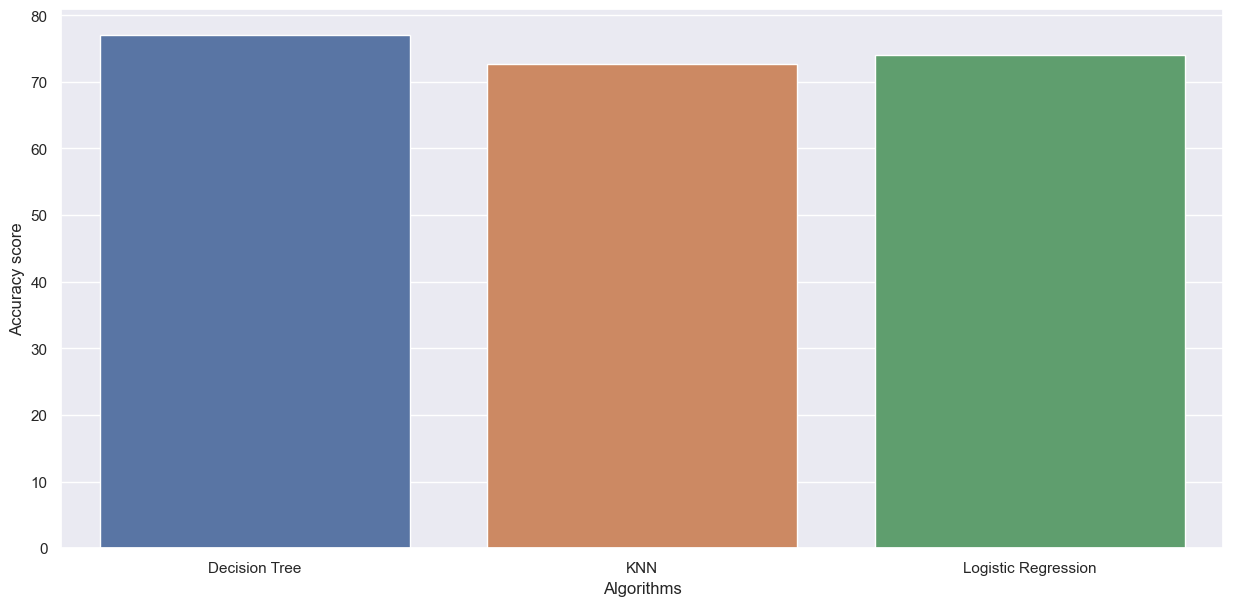

In [65]:
algorithms=['Decision Tree','KNN','Logistic Regression']
scores=[accuracy_dt,accuracy_knn,accuracy_lr]


# In[93]:


sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(data=df,x=algorithms,y=scores)

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(dt,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('diabetes_model.sav','rb'))